# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# Import json as per API documentation 
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
res_btc = requests.get(btc_url)

# Fetch current ETH price
# YOUR CODE HERE!]
res_eth = requests.get(eth_url)

# Compute current value of my crpto
# YOUR CODE HERE!
#res_btc.content
#res_eth.content
data_btc = res_btc.json()
data_btc
json_btcdata = json.dumps(data_btc,indent=4)
#print(json_btcdata)
df_data_btc = pd.DataFrame(data_btc["data"]["1"]["quotes"])
df_data_btc.tail(2)
#type(df_data_btc)
# repeat same process for Ethereum cryptocurrency
data_eth = res_eth.json()
df_data_eth = pd.DataFrame(data_eth["data"]["1027"]["quotes"])
df_data_eth.tail(2)

df_crypto = pd.concat([df_data_btc,df_data_eth], axis="columns", join = "inner")
df_crypto.columns = ["BTC", "ETH"]
df_crypto

current_btc_price = df_crypto["BTC"][7]
current_btc_price
my_btc_value = my_btc*current_btc_price
my_btc_value
current_eth_price = df_crypto["ETH"][7]
my_eth_value = my_eth*current_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13672.68
The current value of your 5.3 ETH is $1985.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca_trade = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-09", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_equity_portfolio = alpaca_trade.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_equity_portfolio.head()

AGG                                      SPY  \
                             open    high    low    close   volume    open   
2020-10-09 00:00:00-04:00  117.65  117.74  117.5  117.705  2750029  345.56   

                                                             
                             high     low   close    volume  
2020-10-09 00:00:00-04:00  347.35  344.89  346.84  45969566

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_equity_close_prices = pd.DataFrame()
df_equity_close_prices
df_equity_close_prices["AGG"] = df_equity_portfolio["AGG"]["close"]
df_equity_close_prices["SPY"] = df_equity_portfolio["SPY"]["close"]
df_equity_close_prices
agg_close_price = df_equity_close_prices["AGG"][0]
#agg_close_price
spy_close_price = df_equity_close_prices["SPY"][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.705
Current SPY closing price: $346.84


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17342.00
The current value of your 200 AGG shares is $23541.00


### Savings Health Analysis

In [24]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
crypto_portfolio_value = my_btc_value + my_eth_value
equity_portfolio_value = my_agg_value + my_spy_value
# initialize list of lists
data = [['crypto', crypto_portfolio_value], ['shares',equity_portfolio_value]]
data
#equity_portfolio_value
df_savings = pd.DataFrame(data, columns = ['portfolio', 'amount'] )
df_savings.set_index('portfolio', inplace=True)

# Display savings DataFrame
display(df_savings)

,amount
portfolio,
crypto,15658.484
shares,40883.000


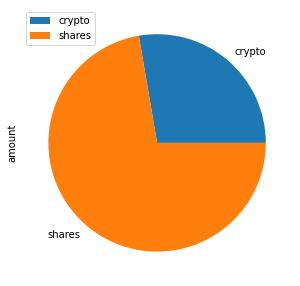

In [26]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount', figsize=(5,5))

In [30]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto_portfolio_value + equity_portfolio_value
#total_savings = 10000
# Validate saving health
# YOUR CODE HERE!

if total_savings > emergency_fund:
    print('Congratulations! you have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print("Congratulations! for reaching this financial goal")
else:
    amount_to_reach_goal = emergency_fund - total_savings
    print(f' you are {amount_to_reach_goal:0.2f} to reach your goal')

Congratulations! you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")